In [34]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [67]:
# Loading datasets 

df = pd.read_csv("Position_salaries.csv")
x = df.iloc[:, 1:2].values  # Feature matrix
y = df.iloc[:, 2].values    # Target vector

df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [61]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [62]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

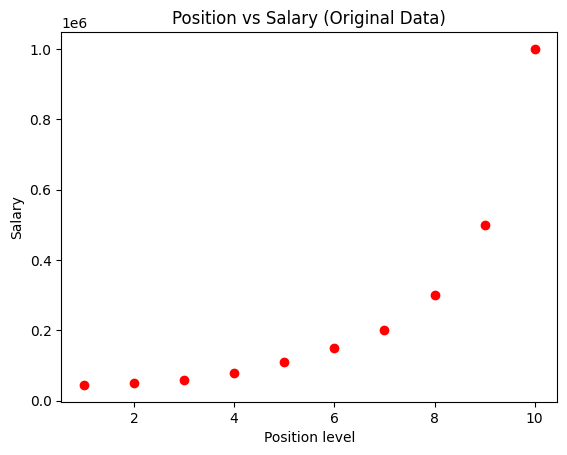

In [63]:
# Scatter plot 
plt.scatter(x, y, color='red')
plt.title('Position vs Salary (Original Data)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

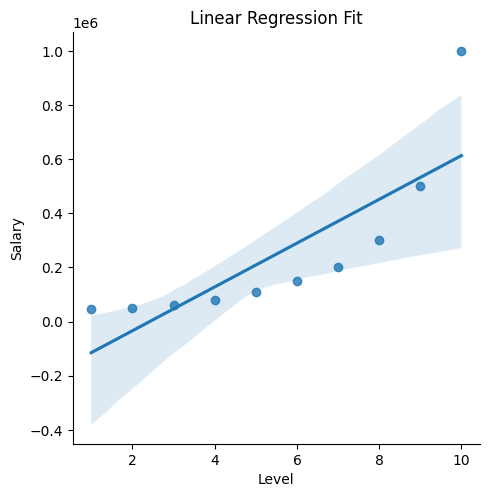

In [64]:
# Linear regression plot using seaborn
sns.lmplot(x='Level', y='Salary', data=df)
plt.title('Linear Regression Fit')
plt.show()


In [65]:
# Fit Linear Regression model
lr = linear_model.LinearRegression()
lr.fit(x, y)


LinearRegression()

In [66]:
# Predict using Linear Regression model
linear_prediction = lr.predict([[6.5]])
print("Linear Regression Prediction for level 6.5:", linear_prediction)


Linear Regression Prediction for level 6.5: [330378.78787879]


In [69]:
# Transform data for Polynomial Regression (degree=2)
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [71]:
# Fit Polynomial Regression model
lr2 = linear_model.LinearRegression()
lr2.fit(x_poly, y)

LinearRegression()

In [72]:
# Predict using Polynomial Regression model
poly_prediction = lr2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for level 6.5:", poly_prediction)

Polynomial Regression Prediction for level 6.5: [189498.10606061]


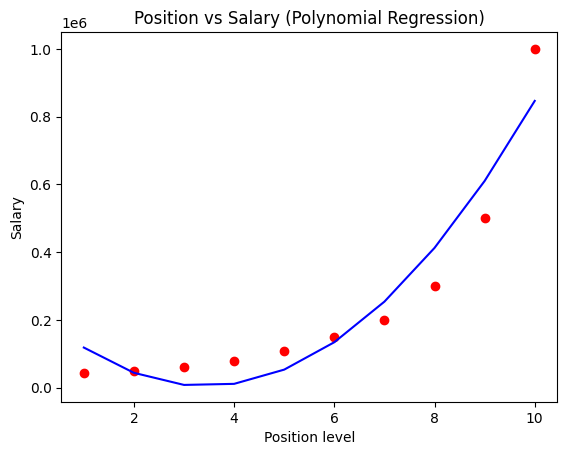

In [73]:
# Plotting Polynomial Regression results
plt.scatter(x, y, color='red')  # Original data points
plt.plot(x, lr2.predict(x_poly), color='blue')  # Polynomial regression line
plt.title('Position vs Salary (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [76]:
# Higher degree Polynomial Regression (degree=4)
poly_reg_high = PolynomialFeatures(degree=4)
x_poly_high = poly_reg_high.fit_transform(x)


In [77]:
# Fit higher degree Polynomial Regression model
lr_high = linear_model.LinearRegression()
lr_high.fit(x_poly_high, y)


LinearRegression()

In [78]:
# Predict using higher degree Polynomial Regression model
high_poly_prediction = lr_high.predict(poly_reg_high.fit_transform([[6.5]]))
print("Higher Degree Polynomial Regression Prediction for level 6.5:", high_poly_prediction)


Higher Degree Polynomial Regression Prediction for level 6.5: [158862.45265155]


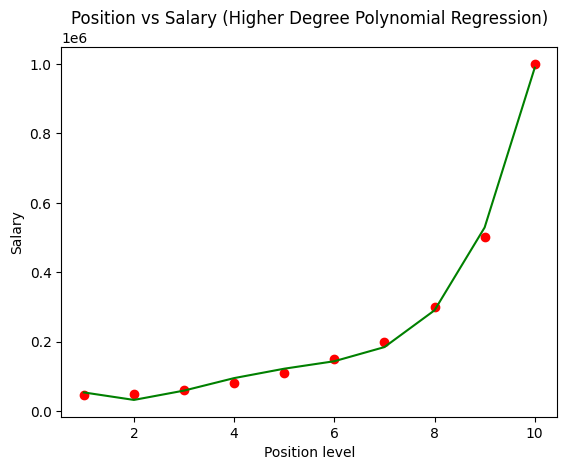

In [79]:
# Plotting higher degree Polynomial Regression results
plt.scatter(x, y, color='red')  # Original data points
plt.plot(x, lr_high.predict(x_poly_high), color='green')  # Higher degree polynomial regression line
plt.title('Position vs Salary (Higher Degree Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()